In [1]:
# Generate Custom Dataset 

# Import libraries 
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

# Create a list of dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Generate date range for sales data
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Simulate sales data
sales = []
for date in date_range:
    # Random base sales with some variability
    base_sales = random.randint(100, 500) 
    # Add some seasonality (more sales in holidays, weekends)
    if date.weekday() in [5, 6]:  # Weekends
        base_sales += random.randint(50, 150)
    if date.month in [11, 12]:  # Holidays in Nov-Dec
        base_sales += random.randint(100, 300)
    if date.month == 7:  # Special summer promotions
        base_sales += random.randint(50, 200)
    sales.append(base_sales)

# Generate promotions data (randomly distributed)
promotions = [random.choice([0, 1]) for _ in range(len(date_range))]  # 1 means promotion, 0 means no promotion

# Generate a holiday flag (randomly with some biases)
holidays = [random.choice([0, 1]) if random.random() < 0.05 else 0 for _ in range(len(date_range))]  # Random holidays with 5% chance

# Store the data into a DataFrame
data = pd.DataFrame({
    'Date': date_range,
    'Sales': sales,
    'Promotion': promotions,
    'Holiday': holidays
})

# Save the dataset as a CSV file
data.to_csv("sales_data.csv", index=False)

# Show the first few rows
data.head()

,Date,Sales,Promotion,Holiday
0,2020-01-01,332,0,1
1,2020-01-02,396,0,0
2,2020-01-03,262,0,0
3,2020-01-04,328,0,0
4,2020-01-05,534,1,0


In [2]:
# Data Preprocessing 
# Load the dataset
data = pd.read_csv('sales_data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Feature engineering: Extract year, month, and day of the week
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.weekday

# Check for missing values
print(data.isnull().sum())

# Fill any missing values (if any) with a reasonable approach (mean, median, etc.)
data.fillna(data.mean(), inplace=True)

# Display the first few rows of the data
data.head()

Date         0
Sales        0
Promotion    0
Holiday      0
Year         0
Month        0
DayOfWeek    0
dtype: int64


,Date,Sales,Promotion,Holiday,Year,Month,DayOfWeek
0,2020-01-01,332,0,1,2020,1,2
1,2020-01-02,396,0,0,2020,1,3
2,2020-01-03,262,0,0,2020,1,4
3,2020-01-04,328,0,0,2020,1,5
4,2020-01-05,534,1,0,2020,1,6


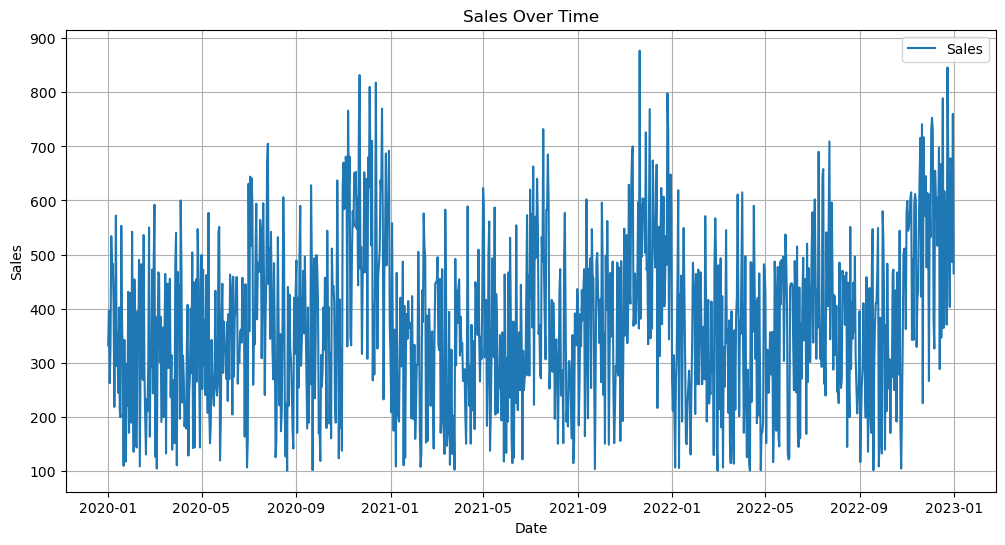

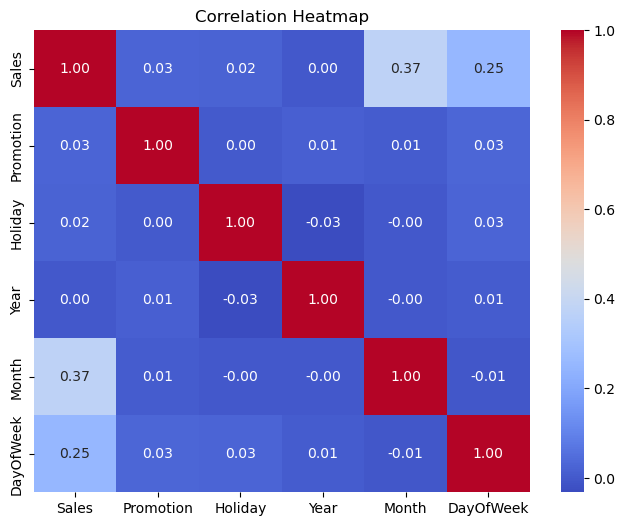

In [3]:
# EDA 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales over time
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# Correlation heatmap
correlation = data[['Sales', 'Promotion', 'Holiday', 'Year', 'Month', 'DayOfWeek']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [4]:
# Feature Engineering 
# Lag feature (previous day's sales)
data['Sales_Lag_1'] = data['Sales'].shift(1)

# Rolling mean feature (7-day rolling mean of sales)
data['Sales_Rolling_Mean_7'] = data['Sales'].rolling(window=7).mean()

# Drop missing values resulting from lag and rolling mean
data = data.dropna()

# Display the first few rows
data.head()

,Date,Sales,Promotion,Holiday,Year,Month,DayOfWeek,Sales_Lag_1,Sales_Rolling_Mean_7
6,2020-01-07,483,0,0,2020,1,1,476.0,401.571429
7,2020-01-08,410,1,0,2020,1,2,483.0,412.714286
8,2020-01-09,218,1,0,2020,1,3,410.0,387.285714
9,2020-01-10,361,1,0,2020,1,4,218.0,401.428571
10,2020-01-11,572,0,0,2020,1,5,361.0,436.285714


In [5]:
# Model Selection and training 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the features (X) and the target (y)
X = data[['Promotion', 'Holiday', 'Year', 'Month', 'DayOfWeek', 'Sales_Lag_1', 'Sales_Rolling_Mean_7']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 96.70807235873947
Mean Squared Error (MSE): 13637.643329966422
Root Mean Squared Error (RMSE): 116.78032081633627


In [6]:
# Forecast Future Sales 
# Assume we want to forecast sales for the next 30 days
future_dates = pd.date_range(start='2023-01-02', periods=30, freq='D')

# Create a dataframe for the future dates
future_data = pd.DataFrame({
    'Date': future_dates,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'DayOfWeek': future_dates.weekday,
    'Promotion': np.random.choice([0, 1], size=30),
    'Holiday': np.random.choice([0, 1], size=30),
    'Sales_Lag_1': np.random.randint(100, 500, size=30),
    'Sales_Rolling_Mean_7': np.random.randint(100, 500, size=30)
})

# Make predictions for future sales
future_sales = model.predict(future_data[['Promotion', 'Holiday', 'Year', 'Month', 'DayOfWeek', 'Sales_Lag_1', 'Sales_Rolling_Mean_7']])

# Add predictions to the future_data dataframe
future_data['Predicted_Sales'] = future_sales

# Show the forecasted sales for the next 30 days
print(future_data[['Date', 'Predicted_Sales']])

         Date  Predicted_Sales
0  2023-01-02       327.382853
1  2023-01-03       243.718656
2  2023-01-04       334.171370
3  2023-01-05       145.647665
4  2023-01-06       303.178672
5  2023-01-07       323.573145
6  2023-01-08       436.930332
7  2023-01-09       389.253162
8  2023-01-10       340.456868
9  2023-01-11       357.976854
10 2023-01-12       294.216705
11 2023-01-13       350.980791
12 2023-01-14       336.913012
13 2023-01-15       493.355221
14 2023-01-16       262.281306
15 2023-01-17       275.728972
16 2023-01-18       353.289709
17 2023-01-19       417.244515
18 2023-01-20       514.301222
19 2023-01-21       220.988668
20 2023-01-22       431.111887
21 2023-01-23       287.630274
22 2023-01-24       314.858974
23 2023-01-25       278.695085
24 2023-01-26       459.278521
25 2023-01-27       196.686636
26 2023-01-28       304.076614
27 2023-01-29       167.600987
28 2023-01-30       341.019296
29 2023-01-31       101.191575


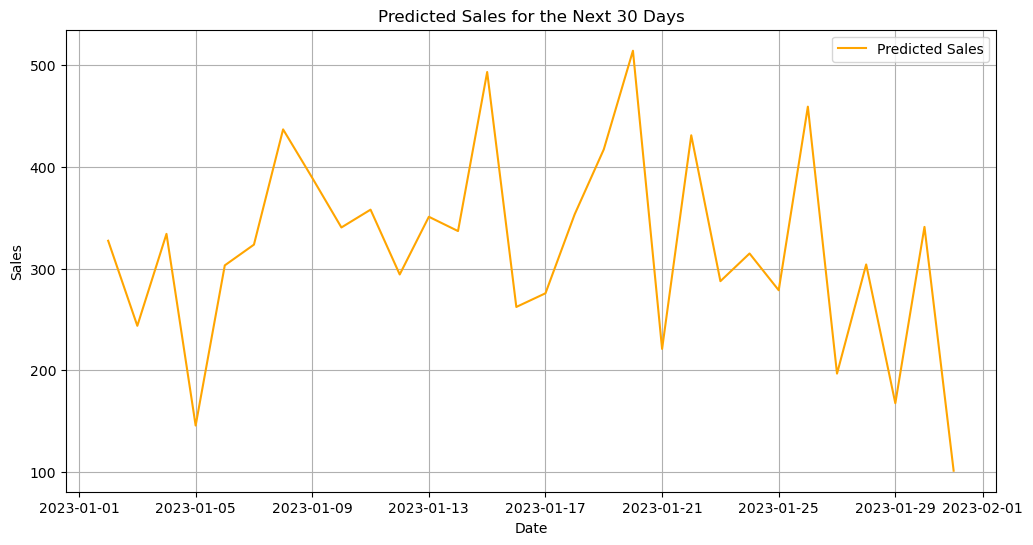

In [7]:
# Visualize the forecast sales 
# Plot future sales
plt.figure(figsize=(12,6))
plt.plot(future_data['Date'], future_data['Predicted_Sales'], label='Predicted Sales', color='orange')
plt.title("Predicted Sales for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()